In [275]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [276]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head()

,Age,Estimated_salary,Purchased
0,56,122455,1
1,46,108179,1
2,32,60714,0
3,25,117946,0
4,38,124616,1


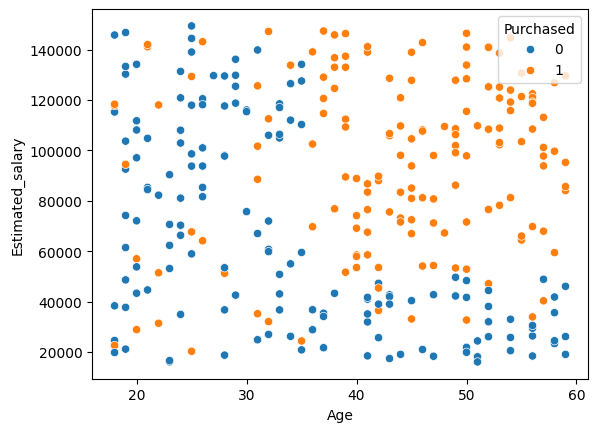

In [277]:
sns.scatterplot(x='Age', y='Estimated_salary', data=dataset,hue='Purchased')
plt.show()

In [278]:
x = dataset.iloc[:,:-1]
y = dataset['Purchased']


In [279]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x), columns=x.columns)

In [280]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.2, random_state=42)


In [281]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [282]:
# knn = KNeighborsClassifier(n_neighbors=12,p=1) 
# eikhane p=1 bolte bujai manhattan_distance r p=2 bolte euclidean_distance. defualt a euclidean_distance bujai

In [283]:
knn.score(x_test,y_test)*100,knn.score(x_train,y_train)*100

(79.16666666666666, 80.0)

In [284]:
#(83.33333333333334, 86.66666666666667)

In [285]:
# for i in range(1,30):
#     knn1 = KNeighborsClassifier(n_neighbors=i)
#     knn1.fit(x_train,y_train)
#     print(i,knn1.score(x_test,y_test)*100,knn1.score(x_train,y_train)*100)

In [286]:
x,y

(          Age  Estimated_salary
 0    1.373160          1.034244
 1    0.565894          0.673186
 2   -0.564279         -0.527264
 3   -1.129365          0.920206
 4   -0.079919          1.088899
 ..        ...               ...
 295  0.969527         -1.657759
 296 -0.079919         -0.120100
 297  0.646620         -0.982558
 298  0.888800          0.858268
 299  0.485167          1.169831
 
 [300 rows x 2 columns],
 0      1
 1      1
 2      0
 3      0
 4      1
       ..
 295    0
 296    1
 297    0
 298    1
 299    1
 Name: Purchased, Length: 300, dtype: int64)

In [287]:
# data scaling korar por jodi predict korte hoy tahole obossoi scaling kora data use korte hobe. actual data(56,122455) use korle sothik predict hobe na

In [290]:
knn.predict([[-1.129365,0.920206]])

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


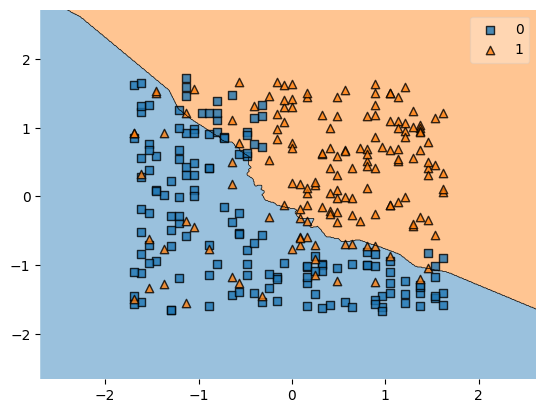

In [289]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=knn)
plt.show()